

```
# This is formatted as code
```



# **1. 과제 설정**
>OTT시장의 규모가 급격히 커지고 있습니다. 유명 PD들도 이제는 방송국이 아닌 ott 시장으로 진출하고 있습니다. OTT플랫폼 하면 빠질 수 없는게 흔히들 얘기하는 '알고리즘의 늪'입니다. 비슷한 컨텐츠를 계속 보여줌으로써 해당 플랫폼 서비스를 계속 이용하게 만듭니다. 이번 기말고사 과제로 평소에 관심있었던 '추천 시스템 알고리즘'에 대하여 탐구하였습니다.

Recommendation system 추천 시스템
>1. Demographic Filtering : 가장 단순한 추천으로 유명한 컨텐츠를 더 많은 사람에게 추천하는 방법. 유저의 성향을 파악하지 않음. 

>2. Content Based Filtering : 컨텐츠의 특징을 뽑아내서 비슷한 특징의 컨텐츠끼리 추천. (메타데이터)

>3. Collaborative Filtering : 시스템 자체가 비슷한 유형의 사람끼리 짝을 지어주고 짝을 기반으로 컨텐츠 추천. 컨텐츠의 특징 뽑아낼 필요 없음.

# **2. Data 수집**
> - url : https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/data
> - df1 : 4803 data, 4 columns 
        movie_id, cast, title, crew
>-  df2 : 4803 data, 20 columns 
        'budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'


>- df1, df2 공통 column : title

In [ ]:
import pandas as pd
import numpy as np
df1=pd.read_csv('/content/drive/MyDrive/sample_data/tmdb_5000_credits.csv')
df2=pd.read_csv('/content/drive/MyDrive/sample_data/tmdb_5000_movies.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
df2=df2.merge(df1) #title 중복 빼고 다 합쳐짐

In [ ]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

#**3. EDA**

###3-1) 범주형, 숫자형 데이터 나누기

In [ ]:
cat_features=[]
num_features=[]
for column, i in zip(df2.columns,df2.dtypes):
  if i==object:
    cat_features.append(column)
  else:
    num_features.append(column)

In [ ]:
print(num_features)


['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'movie_id']


###3-2) 숫자형 데이터 상관관계 알아보기

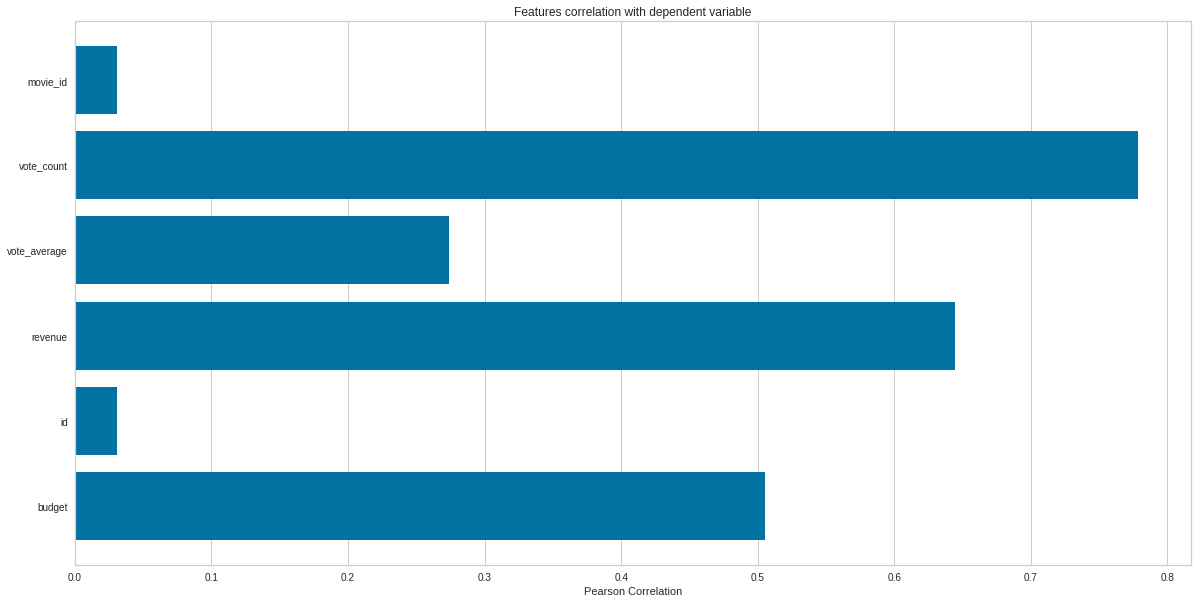

In [ ]:
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
from yellowbrick.base import Visualizer
from yellowbrick.target import FeatureCorrelation
feature_names=['budget','id','revenue','vote_average','vote_count','movie_id']
X,y=df2[feature_names],df2['popularity']
features=np.array(feature_names)

visualizer=FeatureCorrelation(labels=features)
plt.rcParams['figure.figsize']=(20,10)
visualizer.fit(X,y)
visualizer.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig=px.imshow(df2.corr())
fig.show()

> 일반적인 추천 시스템 방식이 전체적으로 인기 높은 영화를 추천하는 방식이기에 popularity와의 상관관계가 높은 변수를 찾아보았다. vote_count(0.77), revenue(0.64), budget(0.5)이 상관관계가 높음을 알 수 있다. 

In [ ]:
fig=px.scatter(df2,x="vote_count",y="popularity",trendline="ols",trendline_color_override='red')
fig.update_layout(title="vote_count x popularity (corr:0.77)<br><sup>outlier가 일부 보이긴 하지만 선형 관계는 확실히 확인할 수 있다.",template="simple_white")
fig.show()

In [ ]:
fig=px.scatter(df2,x="revenue",y="popularity",trendline="ols",trendline_color_override='red')
fig.update_layout(title="revenue x popularity (corr:0.64)",template="simple_white")
fig.show()

In [ ]:
fig=px.scatter(df2,x="budget",y="popularity",trendline="ols",trendline_color_override='red')
fig.update_layout(title="budget x popularity (corr:0.5)<br><sup>예산이 적으면 인기가 적음을 확실히 알 수 있지만 예산이 많다고 인기가 많다고는 보기 힘듦",template="simple_white")
fig.show()

>숫자형 변수들의 전체적인 분포도를 탐색해보았다. x의 범위가 매우 다양함을 알 수 있었다.

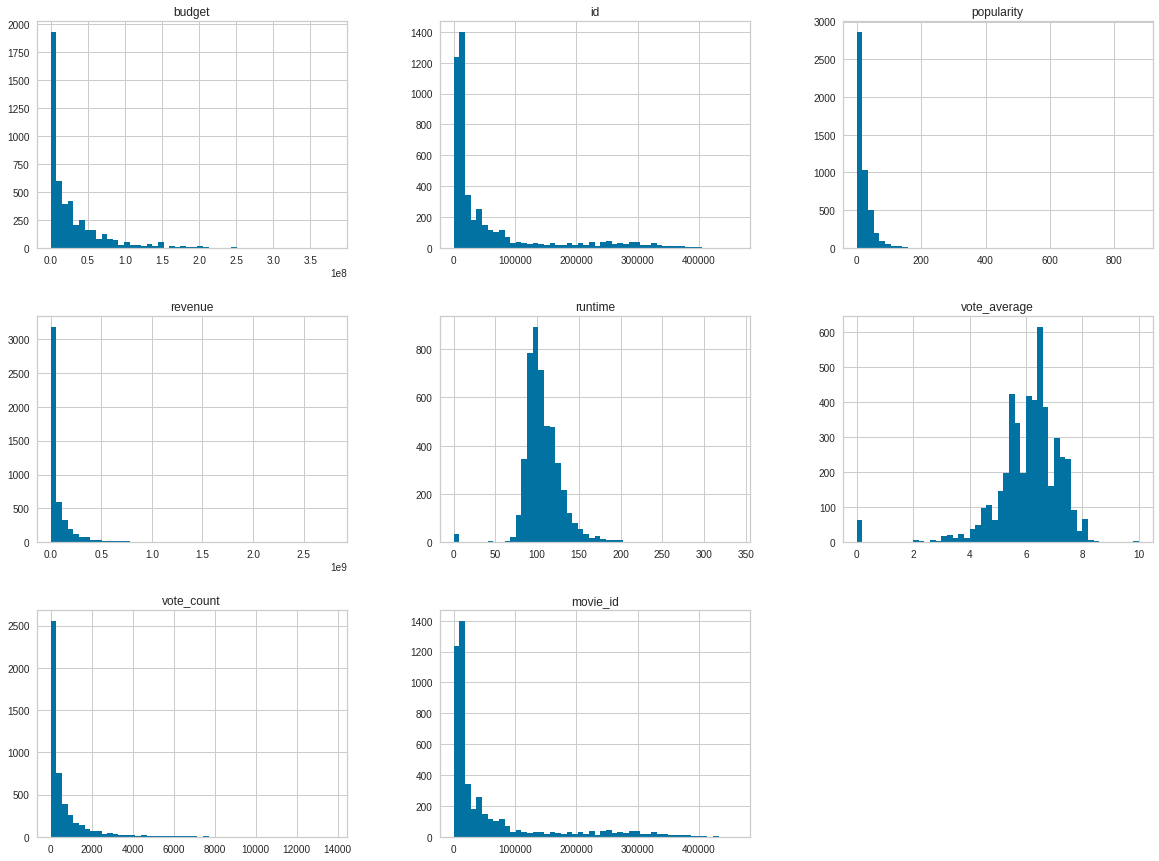

In [ ]:
df2.hist(bins=50,figsize=(20,15))
plt.show()

##3-3). 범주형 데이터 탐색

In [ ]:
print(cat_features)

['genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'cast', 'crew']


In [ ]:
fig =px.scatter(df2, x = "title", y= "popularity")
fig.update_layout(title="영화제목 X 인기도", template="simple_white")
fig.show()

>대부분의 범주형 변수는 아래와 같이 여러 정보를 포함하다 보니 바로 탐색이 불가. 데이터 정제가 필요
    
    genres : [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]

    language : [{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}]

In [ ]:
fig =px.scatter(df2, x = "genres", y= "popularity")
fig.update_layout(title="장르 X 인기도", template="simple_white")
fig.show()

#**4. Filtering**

##4-1) Demographic Filtering
>- 유저의 특성을 고려하지 않은 일반적인 추천
>- Weighted Rating(WR)을 구한 후 점수가 높게 나온 것을 유저에게 추천
>- 데이터가 많을수록 추천하는 근거가 명확해짐
>- Weighted Rating (WR)
>>- v: number of votes for the movie
>>- m: minimum votes required to be listed in chart
>>- R: average rating of the movie
>>- C: mean vote 

In [ ]:
C=df2['vote_average'].mean()
print(C) #1~10에서 평균 점수 : 6

6.092514036182159


In [ ]:
# 최소 vote 수 설정하기. 90%이상의 vote를 가진 것만 남기기
m=df2['vote_count'].quantile(0.9)
m

1842.199999999998

In [ ]:
# 90% 이상의 vote 가진 영화만 남기기 : 481개만 남음
q_movies=df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(481, 23)

In [ ]:
# define weighted_rating(WR)
def weighted_rating(x,m=m,C=C):
  v=x['vote_count']
  R=x['vote_average']

  return (v/(v+m) * R + (m/(m+v) * C))

In [ ]:
# 'weighted_rating()을 부여한 feature을 새로운 점수로 정의
q_movies['score']=q_movies.apply(weighted_rating,axis=1)

In [ ]:
q_movies['score']

0       7.050449
1       6.665452
2       6.239407
3       7.346343
4       6.096523
          ...   
4297    6.693266
4306    7.365618
4308    7.209556
4343    7.197210
4608    7.209640
Name: score, Length: 481, dtype: float64

>Recommender 완성! 하지만 모든 유저에게 제공되는 일반적인 추천으로 유저들의 성향을 파악한 것은 아님
- The Shawshank Redemption이 8점으로 가장 높은 점수를 받았기에 첫번째로 추천됨을 알 수 있다.

In [ ]:
# Recommender based on WR score
q_movies=q_movies.sort_values('score',ascending=False)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1887,The Shawshank Redemption,8205,8.5,8.058576
662,Fight Club,9413,8.3,7.938689
65,The Dark Knight,12002,8.2,7.919564
3237,Pulp Fiction,8428,8.3,7.904036
96,Inception,13752,8.1,7.862848
3342,The Godfather,5893,8.4,7.850454
95,Interstellar,10867,8.1,7.809015
809,Forrest Gump,7927,8.2,7.802587
329,The Lord of the Rings: The Return of the King,8064,8.1,7.726679
1996,The Empire Strikes Back,5879,8.2,7.697175


>> 아래와같이 popularity 특징으로만 영화 인기도를 추출해 보았을 때 WR점수를 기준으로 추출한 영화 추천 순위와 많이 다름을 알 수 있다. 평균 투표 수가 왜 변수로 꼭 고려되어야 하는지를 알 수 있다.

In [ ]:
pop=df2.sort_values('popularity',ascending=True)

Text(0.5, 1.0, 'Popular Movies')

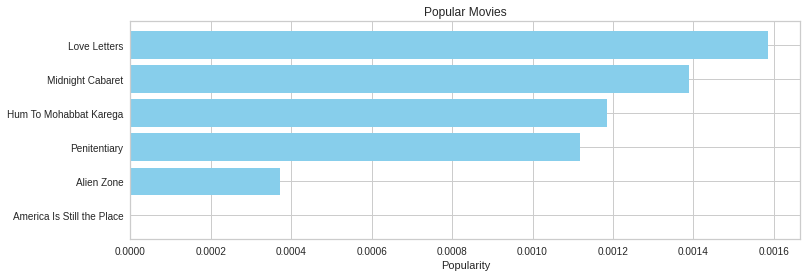

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6),align='center',color='skyblue')

plt.xlabel("Popularity")
plt.title("Popular Movies")




##4-2) Content Based Filtering
>- 영화간의 유사도 파악을 위해 특징 추출 작업 이뤄짐 (메타 데이터)
>- pairwise similarity 점수 부여하고 그 점수 기반으로 추천
>>pairwise similarity(유사도)
1. 자카드 유사도 : 두 집합의 교집합 / 합집합
2. 코사인 유사도 : 두 벡터값의 코사인 각도 (1에 가까울수록 유사도 증가)
3. 유클라디안 유사도 : 거리 측정
4. 맨하탄 유사도 : 격자로 이루어진 지도에서 최단거리

- 여기서는 벡터 크기와 관련 없으므로 코사인 유사도를 이용하였다

###4-2-1) Plot description based Recommender
- overview 특징만을 이용하여 유사도 측정

In [ ]:
# how to find similairty?
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

#### Term Frequency-Inverse Document Frequency (TF-IDF)
- 어떤 단어가 특정 문서 내에서 얼마나 중요한 것인지를 나타내는 통계적 수치. 문서의 핵심어를 추출하거나 검색 엔진에서 검색 결과의 순위를 결정하거나 문서들 사이의 비슷한 정도를 구하는 등의 용도로 사용할 수 있다.

>- TF(Term Frequency) : 특정 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값
- DF(Document Frequency) : 특정 단어가 여러 데이터에 자주 등장하는지를 알려주는 지표
- IDF(Inverse Document Frequency) : DF의 역수. 한 단어가 문서 집합 전체에서 얼마나 공통적으로 나타나는지를 나타내는 값. IDF 값은 문서군의 성격에 따라 결정됨
- TF-IDF : TF와 IDF를 곱한 값. 

- TF-IDF 값이 높아진다는 것은 특정 문서 내에서 단어 빈도가 높지만 전체 문서들 중 그 단어를 포함한 문서는 적다는 의미다. 따라서 이 값을 이용하면 모든 문서에 흔하게 나타나는 단어를 걸러내는 효과를 얻을 수 있다. IDF의 로그 함수값은 항상 1 이상이므로, *TF*-IDF값은 항상 0 이상이 된다. 특정 단어를 포함하는 문서들이 많을 수록 로그 함수 안의 값이 1에 가까워지게 되고, 이 경우 IDF값과 TF-ID값은 0에 가까워지게 된다.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer (stop_words='english')
# 문서에 단어장 생성할 때 'the' 'a' 등 english stop word은 무시

In [ ]:
df2.isna().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [ ]:
# 빈값은 empty string으로 대체
df2['overview']=df2['overview'].fillna('')
# overview 데이터를 fit, transform하여 TF-IDF matrix 생성
tfidf_matrix=tfidf.fit_transform(df2['overview'])

In [ ]:
tfidf_matrix

<4809x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 126074 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.shape
#20978 words used to describe 4809 movies

(4809, 20978)

#### Pairwise metrics, Kernels
- 'sklearn.metrics.pairwise' 모듈은 거리 행렬과 커널을 모두 포함.
- kernel : 유사도 측정 방법
>- Linear kernel : k(x,y)=x^T y

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

#similarity score
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02161047, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01489056, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02161047, 0.01489056, ..., 1.        , 0.01607413,
        0.00702169],
       [0.        , 0.        , 0.        , ..., 0.01607413, 1.        ,
        0.01171699],
       [0.        , 0.        , 0.        , ..., 0.00702169, 0.01171699,
        1.        ]])

In [ ]:
# movie제목과 인덱스 위치 바꾸기
indices=pd.Series(df2.index,index=df2['title']).drop_duplicates()

In [ ]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [ ]:
# 새로운 추천 시스템 정의
def get_recommendations(title, cosine_sim=cosine_sim):
  # get index of movie that matches the title
  idx=indices[title]
  #get pairwise similarity score of all movies with that movie
  sim_scores=list(enumerate(cosine_sim[idx]))
  #sort movies based on similarity score
  sim_scores=sorted(sim_scores,key=lambda x :x[1],reverse=True)
  #get scores ot 10 most similar movies
  sim_scores=sim_scores[1:11]

  #get movie indices
  movie_indices=[i[0] for i in sim_scores]

  #return the top 10 most similar movies
  return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Avengers') # cosine similarity가 높은 상위 10개 영화들이 나옴

7               Avengers: Age of Ultron
3149                            Plastic
1721                            Timecop
4131                 This Thing of Ours
3316              Thank You for Smoking
3038                      The Corruptor
588     Wall Street: Money Never Sleeps
2142         Team America: World Police
1474                       The Fountain
1289                        Snowpiercer
Name: title, dtype: object

>코사인 유사도를 이용한 추천 시스템은 영화 자체의 고유 특징을 살리진 못한다. 예를 들어, "Dark Knight Rises"시리즈는 배트맨 영화들을 추천 영화로 도출할텐데 주연 배우인 크리스토퍼 놀란이 나온 영화를 원하는 유저도 있을 것이다. 따라서, 우리가 원하는 데이터들로만 메타데이터를 만들어서 그것을 바탕으로 추천 시스템을 새롭게 만들 것이다.

###4-2-2) Crew, Cast, Genres, Keywords based Recommender

>- 메타데이터를 새롭게 생성 : director,cast,genre,keyword 이용
>- 메타데이터 생성을 위해서는 새로운 구조(literl_eval)로 변화 필요
>>- literal_eval : 문자열을 딕셔너리/리스트 형태로 바꿈


In [ ]:
# parse stringified feature into corresponding python objects
from ast import literal_eval
features=['cast','crew','keywords','genres']
for feature in features:
  df2[feature]=df2[feature].apply(literal_eval)

In [ ]:
# crew 특징에서 감독 이름만 뽑아내기
def get_director(x):
  for i in x:
    if i['job']=='Director':
      return i['name']
  return np.nan

In [ ]:
# top 3개의 이름 뽑아내기
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# director, cast, genre, keyword 새롭게 정제
df2['director']=df2['crew'].apply(get_director)

features=['cast','keywords','genres']
for feature in features:
  df2[feature]=df2[feature].apply(get_list)


In [ ]:
# 새롭게 정제한 데이터
df2[['title','cast','director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [ ]:
# 소문자로 변환하고 띄어쓰기 모두 제거하기
# Jonny Depp 과 Johnny Galecki를 동일한 것으로 벡터화 하는 것 방지 위해
def clean_data(x):
  if isinstance(x,list):
    return [str.lower(i.replace(" ",""))for i in x]
  else:
    #check if director exists. IF not, return empty string
    if isinstance(x,str):
      return str.lower(x.replace(" ",""))
    else:
      return ''

In [ ]:
# 위의 clean data 함수를 각 변수에 적용
features=['cast','keywords','director','genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [ ]:
df2[['title','cast','director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [ ]:
# create metadata (contain all metadata that we want to vectorize)
def create_soup(x):
  return ' '.join(x['keywords'])+' '+' '.join(x['cast'])+' '+x['director']+' '+' '.join(x['genres'])
df2['soup']=df2.apply(create_soup,axis=1)

In [ ]:
df2['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4804    unitedstates–mexicobarrier legs arms carlosgal...
4805     edwardburns kerrybishé marshadietlein edwardb...
4806    date loveatfirstsight narration ericmabius kri...
4807       danielhenney elizacoupe billpaxton danielhsia 
4808    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4809, dtype: object

####Countvectorizer
- 단어들의 카운트로 여러 문서들 벡터화


In [ ]:
#TF-IDF 가 아닌 countvectorize이용 -> 배우/감독이 자주 나온다고 가중치 줄이면 안됨.
from sklearn.feature_extraction.text import CountVectorizer

count=CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [ ]:
# cosine similarity matrix 적용하기
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# reset index of main dataframe 
df2=df2.reset_index()

In [ ]:
df2.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...


In [ ]:
#construct reverse mapping
indices=pd.Series(df2.index,index=df2['title'])

In [ ]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
  # get index of movie that matches the title
  idx=indices[title]
  #get pairwise similarity score of all movies with that movie
  sim_scores=list(enumerate(cosine_sim[idx]))
  #sort movies based on similarity score
  sim_scores=sorted(sim_scores,key=lambda x :x[1],reverse=True)
  #get scores ot 10 most similar movies
  sim_scores=sim_scores[1:11]

  #get movie indices
  movie_indices=[i[0] for i in sim_scores]

  #return the top 10 most similar movies
  return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4644    Amidst the Devil's Wings
1199                The Prestige
3078           Romeo Is Bleeding
3331              Black November
1509                      Takers
1992                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

>- 메타데이터가 많고 정확할수록 recommender가 더 성공적!
>- production_company 등을 메타데이터로 더 추가해볼 수 있다.
>- soup 데이터에 변수를 추가하여 변수의 가중치에 변화를 줄 수도 있다.

###4-2-3) Metadata 생성 안 했을 때와 했을 때 recommendation 비교

|metadata x|metadata o|
|------|---|
|The Dark Knight|The Dark Knight
|Batman Forever|Batman Begins
|Batman Returns|Amidst the Devil's Wings
|Batman|The Prestige|
|Batman Begins|Remeo Is Bleeding|

>메타데이터가 있을 때 내가 가중치를 더 부여하고 싶은 변수에 따른 추천 시스템을 만들 수 있다.

##4-3) Collaborative Filtering
- 이용자간 유사도를 측정 (pearson 상관관계 혹은 코사인 유사도 이용) 하여 그 유사도를 기반으로 추천.
- Singular Value Decomposition (SVD)를 이용하여 RMSE를 감소시킴

In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import surprise

In [ ]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate

In [ ]:
ratings=pd.read_csv('/content/drive/MyDrive/sample_data/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

svd = SVD(random_state=13)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8962  0.8962  0.9016  0.8940  0.8937  0.8964  0.0029  
MAE (testset)     0.6919  0.6902  0.6952  0.6863  0.6875  0.6902  0.0032  
Fit time          12.88   10.37   7.90    4.94    5.07    8.23    3.07    
Test time         0.37    0.30    0.15    0.19    0.15    0.23    0.09    


{'fit_time': (12.883571863174438,
  10.37041711807251,
  7.901637077331543,
  4.935185432434082,
  5.067250967025757),
 'test_mae': array([0.69194902, 0.69016114, 0.69521096, 0.68631554, 0.68751988]),
 'test_rmse': array([0.89622537, 0.89623111, 0.90164875, 0.89398655, 0.89369122]),
 'test_time': (0.3745424747467041,
  0.2953314781188965,
  0.14724326133728027,
  0.19466066360473633,
  0.1457674503326416)}

In [ ]:
trainset=data.build_full_trainset()
svd.trainset

> userID 1이 영화에 부여한 점수

In [ ]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1,31)

Prediction(uid=1, iid=31, r_ui=None, est=2.482060361877031, details={'was_impossible': False})